In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

sns.set_style("whitegrid")

In [2]:
# load in identification.xlsx with pandas
df = pd.read_excel('identification.xlsx')

# in fill all NaNs with forward fill
df = df.fillna(method='ffill')

# replace distance with base + distance
df['distance'] = df['Base Distance'] + df['Distance']

# remove base distance
df = df.drop('Base Distance', axis=1)

# remove all unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# make transect integer
df['transect'] = df['transect'].astype(int)

df = df.drop('Quadrant', axis=1)

df.head()

,zone,transect,Distance,Species,Class,Type,Key,distance
0,High coral zone,0,0.0,Acropora,C,Branching,C - coral,0.0
1,High coral zone,0,0.0,Platygyra,C,Meandering,N - Anenome,0.0
2,High coral zone,0,0.0,Porite,C,Massive,F - Fish,0.0
3,High coral zone,0,0.0,Favia,C,Massive,S - Starfish,0.0
4,High coral zone,0,0.0,Montipora,C,Vase?,M - Mollusc,0.0


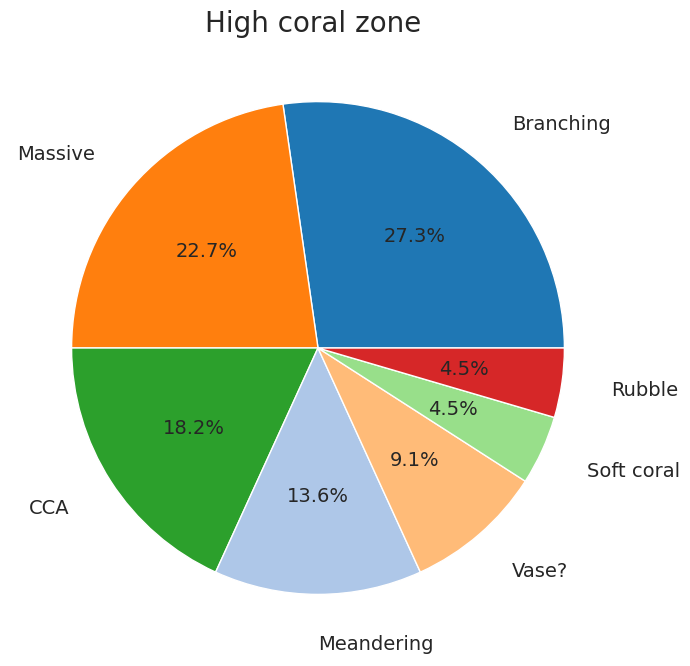

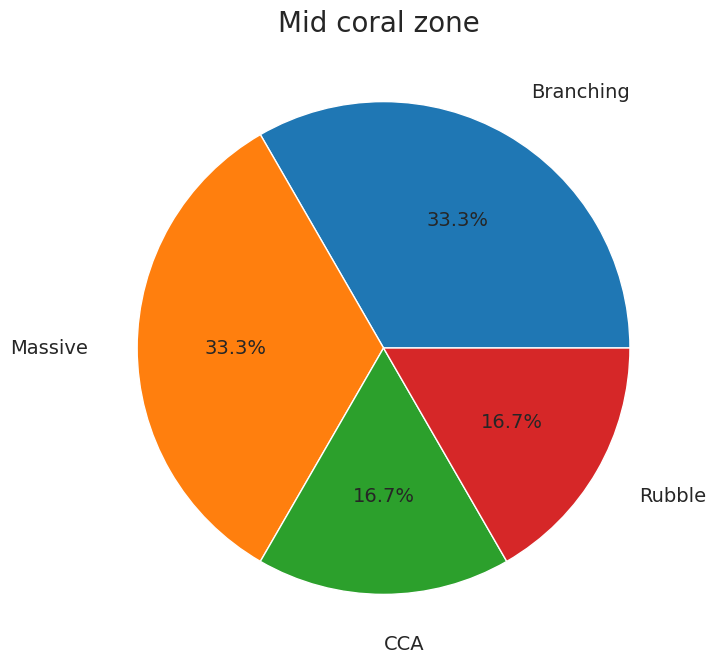

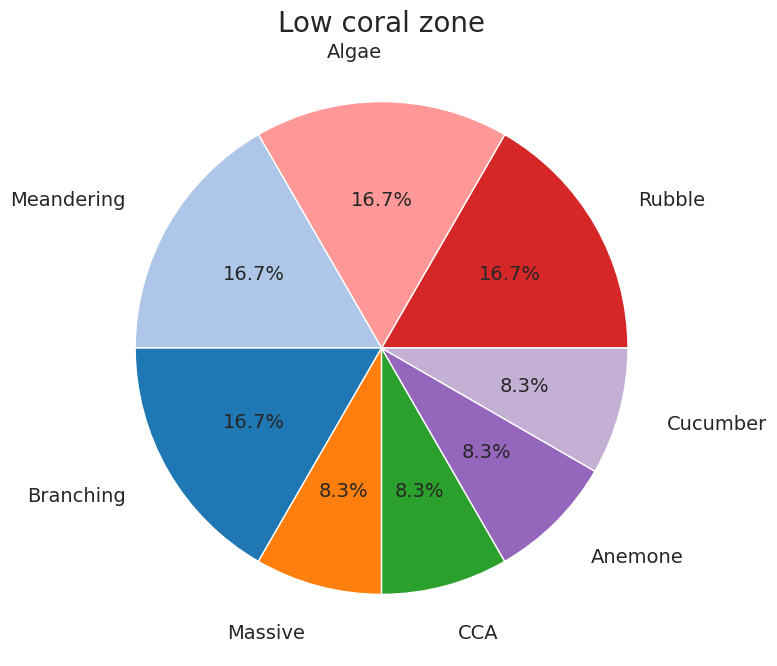

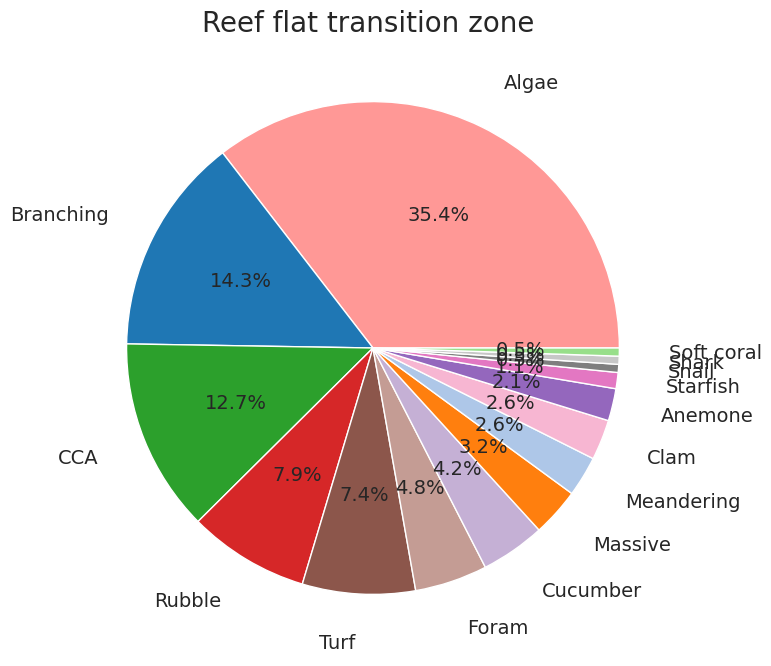

In [3]:
colour_map = {}
contrasting_colour_array = plt.cm.tab20.colors

for coral_type, count in zip(df['Type'].unique(), range(len(df['Type'].unique()))):
    colour_map[coral_type] = contrasting_colour_array[count]

# generate pie charts of type breakdown for each "zone" with percentages
for zone in df['zone'].unique():
    # consistent figure size
    plt.figure(figsize=(8, 8))
    plt.tight_layout()
    plt.title(zone, fontsize=20)
    plt.pie(df[df['zone'] == zone]['Type'].value_counts(),
            labels=df[df['zone'] == zone]['Type'].value_counts().index,
            autopct='%1.1f%%',
            colors=[colour_map[coral_type] for coral_type in df[df['zone'] == zone]['Type'].value_counts().index],
            textprops={'fontsize': 14},
            labeldistance=1.2)
    
    #
    plt.savefig('output/map/{}_pie_chart.png'.format(zone.replace(" ", "_")), dpi=300, bbox_inches='tight')

<AxesSubplot: title={'center': 'b and w'}, xlabel='distance', ylabel='Type'>

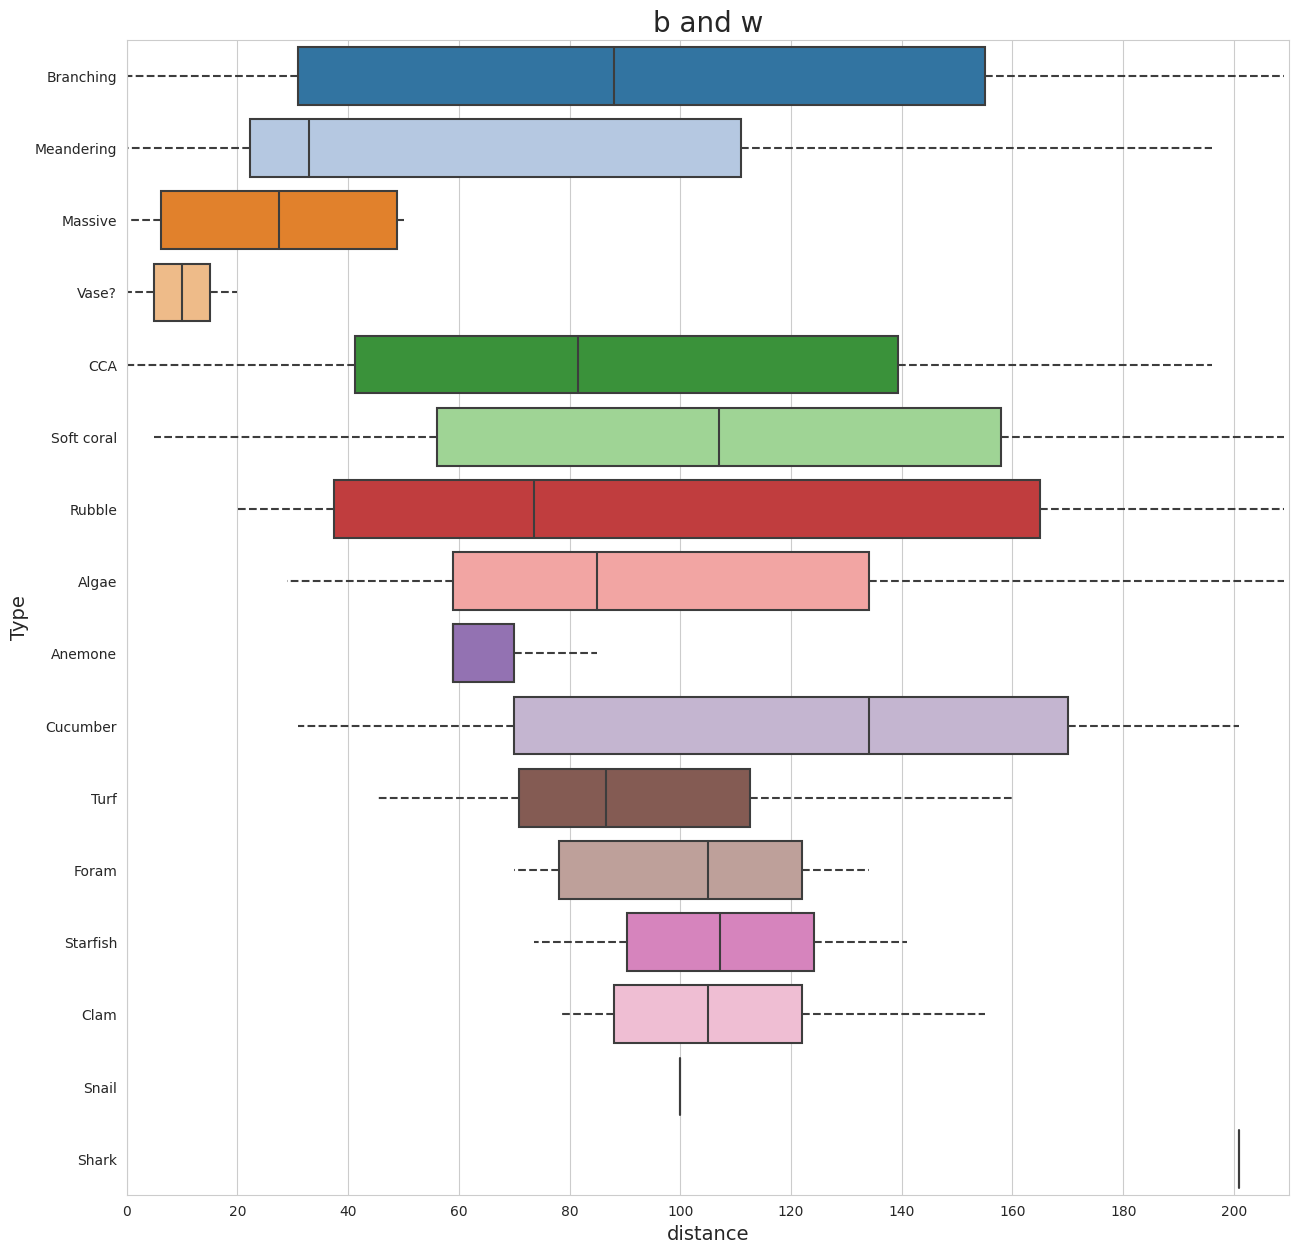

In [4]:
# filter out coral tinstances of coral if type only appears once in transect
new_df=df
for transect in df['transect'].unique():
    # print(transect)
    type_map = {}
    for row in df[df['transect'] == transect].iterrows():
        if row[1]['Type'] not in type_map:
            type_map[row[1]['Type']] = 1
        else:
            type_map[row[1]['Type']] += 1
    # print(type_map)
    # for type in type_map:
    #     if type_map[type] == 1:
    #         new_df = new_df.drop(new_df[(new_df['transect'] == transect) & (new_df['Type'] == type)].index)

 

# create a bar graph of presence of species by distance 
plt.figure(figsize=(15,15))
plt.tight_layout()
plt.title("b and w", fontsize=20)
plt.xlabel('Distance (m)', fontsize=14)
plt.ylabel('Coral Type', fontsize=14)

# ticks every 5m
plt.xticks(range(0, 210, 20))

plt.xlim(0, 210)

# violin plot
# sns.violinplot(x='distance', y='Type', data=df, palette=colour_map, inner=None, scale="width")

# box plot
sns.boxplot(x='distance', y='Type', data=df, palette=colour_map, showfliers=False, showcaps=False, whiskerprops={'linestyle' : '--'})

# plot stacked area graph


In [19]:
# create dataframe of type quanitty for each distance
coral_types = df['Type'].unique()
columns= ['distance']  + coral_types.tolist()
distance__and_quantity_df = pd.DataFrame(columns=columns)

for distance in df['distance'].unique():
    row = {'distance': distance}
    for coral_type in coral_types:
        row[coral_type] = len(df[(df['distance'] == distance) & (df['Type'] == coral_type)])
    distance__and_quantity_df = pd.concat([distance__and_quantity_df, pd.DataFrame([row])], ignore_index=True)

# distance as integer
distance__and_quantity_df['distance'] = distance__and_quantity_df['distance'].astype(int)

distance__and_quantity_df

,distance,Branching,Meandering,Massive,Vase?,CCA,Soft coral,Rubble,Algae,Anemone,Cucumber,Turf,Foram,Starfish,Clam,Snail,Shark
0,0,2,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0
1,5,2,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0
2,10,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,20,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0
4,26,2,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0
5,29,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0
6,31,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0
7,35,1,1,0,0,1,0,1,2,0,0,0,0,0,0,0,0
8,40,0,0,1,0,1,0,1,2,0,0,0,0,0,0,0,0
9,45,0,0,1,0,1,0,1,4,0,0,1,0,0,0,0,0


/tmp/ipykernel_26019/1513117504.py:33: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  l1 = plt.Polygon(p1, closed=None, fill=True, edgecolor=c, alpha=0.4, color=c)
/tmp/ipykernel_26019/1513117504.py:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  l2 = plt.Polygon(p2, closed=None, fill=True, edgecolor=c, alpha=0.4, color=c)
/tmp/ipykernel_26019/1513117504.py:35: MatplotlibDeprecationWarning: Passing argument *line* of unexpected type Polygon to add_line which only accepts <class 'matplotlib.lines.Line2D'> is deprecated since 3.5 and will become an error two minor releases later.
  plt.gca().add_line(l1)
/tmp/ipykernel_26019/1513117504.py:36: MatplotlibDeprecationWarning: Passing argument *line* of unexpected type Polygon to add_line which only accepts <class 'matplotlib.lines.Line2D'> is deprecated since 3.5 and will become an error two minor releases later.
  plt.gca().add_line(l2)


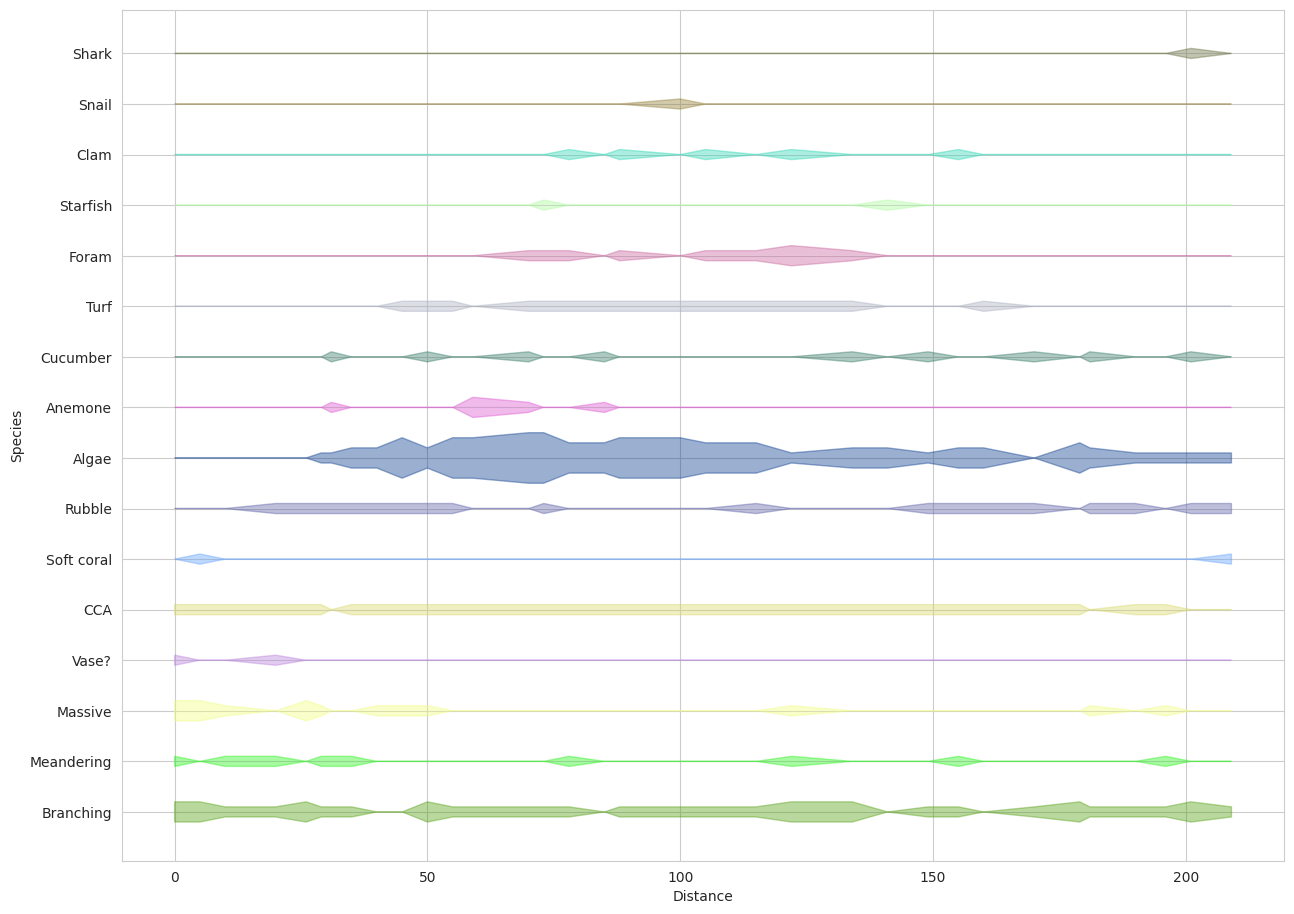

In [53]:
def kite_diagram(df, axis_labs):
    """Function to draw a kite diagram."""   
    plt.figure(figsize=(15,15))
    plt.axes()
    start_points = []
    v1 = np.array(df.iloc[:, [0]])
    y_values = df.columns
    y_values = np.delete(y_values, 0)
    num_cols = len(df.columns) - 1
    
    df_cols = df.iloc[:, 1:len(df.columns)]
    max_val = max(df_cols.max())*2
        
    for j in range(1, num_cols + 1):
        p1 = []
        p2 = []        
        v2 = np.array(df.iloc[:, [j]]) / 2       
        if j == 1:
            start_point = max_val / 2
        else:
            start_point = start_point + max_val        
        start_points.append(start_point)
        p1.append([0, start_point])
        p2.append([0, start_point])
        
        for i in range(0, len(v1)):
            p1.append([v1[i][0], (start_point + 2*v2[i])[0]]) 
            p2.append([v1[i][0], (start_point - 2*v2[i])[0]])  
        p1.append([v1[i][0], start_point])
        p2.append([v1[i][0], start_point])        
        c = np.random.rand(3,)
        
        l1 = plt.Polygon(p1, closed=None, fill=True, edgecolor=c, alpha=0.4, color=c)
        l2 = plt.Polygon(p2, closed=None, fill=True, edgecolor=c, alpha=0.4, color=c)        
        plt.gca().add_line(l1)
        plt.gca().add_line(l2)
    plt.yticks(start_points, y_values)
    plt.xlabel(axis_labs[0])
    plt.ylabel(axis_labs[1])
    plt.axis('scaled')
    plt.savefig('output/map/kite_diagram.png', dpi=300, bbox_inches='tight')
    plt.show()

kite_diagram(distance__and_quantity_df, ['Distance', 'Species'])